In [ ]:
pip install ucimlrepo

In [ ]:
##Data Ingestion

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets
# Convert y to binary
y = (y > 0).astype(int)


# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

In [ ]:
X.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [ ]:
y.describe(include='all')

,num
count,303.000000
mean,0.458746
std,0.499120
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
##Train and Test data split

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Engineering
def preprocess_features(X):
    X = X.copy()
    # Fill missing values
    X['age'].fillna(X['age'].median(), inplace=True)
    X['chol'].fillna(X['chol'].median(), inplace=True)
    X['trestbps'].fillna(X['trestbps'].median(), inplace=True)
    X['thal'].fillna(X['thal'].median(), inplace=True)
    X['ca'].fillna(X['ca'].median(), inplace=True)

    # Convert categorical variables to numeric
    #X['sex'] = X['sex'].map({'male': 0, 'female': 1})

    # Drop columns that are not needed
    #X.drop(columns=['Name', 'ID'], inplace=True)

    return X

# Apply preprocessing to train and test features
X_train = preprocess_features(X_train)
X_test = preprocess_features(X_test)

# Assuming y doesn't need preprocessing, but if it does, you can add a similar function for y


In [ ]:
X_train.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,54.805785,0.657025,3.090909,132.289256,245.619835,0.136364,0.991736,150.099174,0.338843,1.035537,1.595041,0.640496,4.673554
std,9.110177,0.475687,0.989572,18.208993,48.262982,0.343886,0.997889,22.470970,0.474297,1.187861,0.618907,0.896566,1.929473
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,2.000000,120.000000,212.000000,0.000000,0.000000,136.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,240.000000,0.000000,0.500000,152.500000,0.000000,0.750000,2.000000,0.000000,3.000000
75%,61.750000,1.000000,4.000000,140.000000,272.500000,0.000000,2.000000,166.750000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,417.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [ ]:
y_train.describe()

,num
count,242.000000
mean,0.442149
std,0.497671
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Preprocessing pipeline
numeric_features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_features = []  # Currently no categorical features
if categorical_features:
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    transformers = [
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
else:
    transformers = [
        ('num', numeric_transformer, numeric_features)
    ]
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ]
)


# Model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier())
])

# Reshape y_train and y_test
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()




In [ ]:
# Hyperparameter tuning with error_score='raise'
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', error_score='raise')
try:
    grid_search.fit(X_train, y_train)
except ValueError as e:
    print("Error during grid search:", e)

# Best model
if hasattr(grid_search, 'best_estimator_'):
    best_model = grid_search.best_estimator_
    # Evaluation
    y_pred = best_model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # Save the model
    joblib.dump(best_model, 'HD_model.pkl')

    # Model deployment and monitoring (simplified example)
    def predict(input_data):
        model = joblib.load('HD_model.pkl')
        return model.predict(input_data)

    # Example usage
    sample_data = X_test.iloc[:5]
    print(predict(sample_data))
else:
    print("Grid search did not find a valid model.")

Accuracy: 0.8688524590163934
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

[0 1 1 0 1]


In [ ]:
# Print column names of X_train
print("Columns in X_train:", X_train.columns)

# Ensure all columns in numeric_features are present in X_train
missing_cols = [col for col in numeric_features if col not in X_train.columns]
if missing_cols:
    print("Missing columns:", missing_cols)
else:
    print("All columns are present.")


Columns in X_train: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')
All columns are present.


     Feature  Importance
2         cp    0.220449
11        ca    0.184518
12      thal    0.115202
9    oldpeak    0.100730
0        age    0.072974
1        sex    0.065335
4       chol    0.058354
10     slope    0.053843
3   trestbps    0.050068
7    thalach    0.045876
8      exang    0.024377
6    restecg    0.006261
5        fbs    0.002013


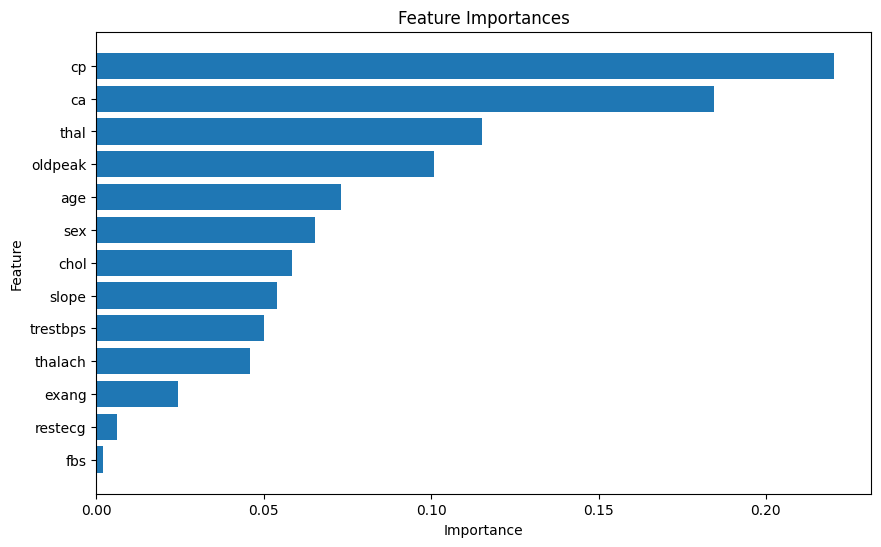

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming best_model is your trained GradientBoostingClassifier
feature_importances = best_model.named_steps['classifier'].feature_importances_

# Get feature names from the preprocessor
feature_names = numeric_features  # Since we only have numeric features

# Create a DataFrame for better visualization
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(importances_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()
